# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold,  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score

# 2. Load dataset

In [2]:
df_fh = pd.read_csv("./fetal_health.csv")
df_fh.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df_fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df_fh.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Bộ dữ liệu này chứa 2126 bản ghi các đặc điểm được trích xuất từ các bài kiểm tra Điện tâm đồ, sau đó được bác sĩ sản khoa chuyên gia phân loại thành 3 loại:

Bình thường - 1

Nghi ngờ - 2

Bệnh lý - 3

# 3. Random Forest Model

In [5]:
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [6]:
X_rf = df_fh.drop(["fetal_health"],axis=1)
y_rf = df_fh["fetal_health"]


In [7]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 42, stratify = y_rf)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

**3.1. Mô hình cơ sở**

In [9]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

accuracy_score_before = accuracy_score(y_test, pred_random_forest)
mse_random_forest_before = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest_before = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train_before = random_forest_mod.score(X_train, y_train)
score_random_forest_test_before = random_forest_mod.score(X_test, y_test)

Baseline Random Forest: 0.923


In [10]:
print("Độ chính xác của mô hình là:", accuracy_score_before)

print(f"Mean Square Error for Random Forest = {mse_random_forest_before}")
print(f"Root Mean Square Error for Random Forest = {rmse_random_forest_before}")
print(f"R^2(coefficient of determination) on training set = {score_random_forest_train_before}")
print(f"R^2(coefficient of determination) on testing set = {score_random_forest_test_before}")

Độ chính xác của mô hình là: 0.9231974921630094
Mean Square Error for Random Forest = 0.10031347962382445
Root Mean Square Error for Random Forest = 0.31672303298595833
R^2(coefficient of determination) on training set = 0.9993279569892473
R^2(coefficient of determination) on testing set = 0.9231974921630094


In [11]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       497
         2.0       0.80      0.67      0.73        88
         3.0       0.90      0.87      0.88        53

    accuracy                           0.92       638
   macro avg       0.88      0.84      0.86       638
weighted avg       0.92      0.92      0.92       638



In [12]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.92540323 0.94354839 0.93346774]
CrossValMeans: 0.934
CrossValStandard Deviation: 0.007


In [13]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [14]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [15]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [16]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(n_estimators=200)


In [17]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.938


In [25]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=200, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

accuracy_score_after = accuracy_score(y_test, pred_random_forest)
mse_random_forest_after = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest_after = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train_after = random_forest_mod.score(X_train, y_train)
score_random_forest_test_after = random_forest_mod.score(X_test, y_test)

In [26]:
print("Độ chính xác của mô hình là:",accuracy_score_after)

print(f"Mean Square Error for Random Forest = {mse_random_forest_after}")
print(f"Root Mean Square Error for Random Forest = {rmse_random_forest_after}")
print(f"R^2(coefficient of determination) on training set = {score_random_forest_train_after}")
print(f"R^2(coefficient of determination) on testing set = {score_random_forest_test_after}")

Độ chính xác của mô hình là: 0.9294670846394985
Mean Square Error for Random Forest = 0.0987460815047022
Root Mean Square Error for Random Forest = 0.31423889241260733
R^2(coefficient of determination) on training set = 0.9993279569892473
R^2(coefficient of determination) on testing set = 0.9294670846394985


In [27]:
data = {
    "Metric": ["Accuracy Score","Mean Squared Error", "Root Mean Squared Error", "R^2 (Train)", "R^2 (Test)"],
    "Before": [accuracy_score_before, mse_random_forest_before, rmse_random_forest_before, score_random_forest_train_before, score_random_forest_test_before],
    "After": [accuracy_score_after, mse_random_forest_after, rmse_random_forest_after, score_random_forest_train_after, score_random_forest_test_after]
}

df = pd.DataFrame(data)
df.set_index("Metric", inplace=True)

print(df)


                           Before     After
Metric                                     
Accuracy Score           0.923197  0.929467
Mean Squared Error       0.100313  0.098746
Root Mean Squared Error  0.316723  0.314239
R^2 (Train)              0.999328  0.999328
R^2 (Test)               0.923197  0.929467


In [28]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.83      0.70      0.76        88
         3.0       0.89      0.91      0.90        53

    accuracy                           0.93       638
   macro avg       0.89      0.86      0.87       638
weighted avg       0.93      0.93      0.93       638



In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[483  10   4]
 [ 24  62   2]
 [  2   3  48]]


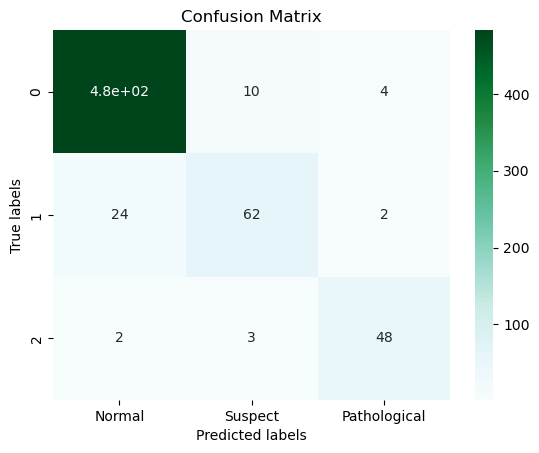

In [30]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);